In [ ]:
#Importing necessary libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#the data is already cleaned and processed
(xtrain, ytrain), (Xtest, ytest) = tf.keras.datasets.cifar100.load_data(label_mode="fine")

169001437/169001437 [==============================] - 14s 0us/step


In [ ]:
print(f'The shape of X_train is :{xtrain.shape}','\t',f'The shape of Y_train is :{ytrain.shape}','\n', f'The shape of X_test is :{Xtest.shape}','\t',f'The shape of y_test is :{ytest.shape}')

The shape of X_train is :(50000, 32, 32, 3) 	 The shape of Y_train is :(50000, 1) 
 The shape of X_test is :(10000, 32, 32, 3) 	 The shape of y_test is :(10000, 1)


In [ ]:
X_train = xtrain / 255.0
X_test = Xtest / 255.0

In [ ]:
Model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, input_shape=(32, 32, 3), kernel_size=(2, 2), strides=(1, 1)),
    tf.keras.layers.MaxPooling2D(strides=(1, 1)),
    tf.keras.layers.Conv2D(64, kernel_size=(2, 2)),
    tf.keras.layers.MaxPooling2D(strides=(1, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(100, activation='softmax')
])

Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 31, 31, 32)        416       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_3 (Dense)             (None, 256)              

In [ ]:
Model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = Model.fit(X_train, ytrain, epochs=30, batch_size=32)

Epoch 1/30
1563/1563 [==============================] - 22s 7ms/step - loss: 3.6868 - accuracy: 0.1478
Epoch 2/30
1563/1563 [==============================] - 10s 7ms/step - loss: 2.9648 - accuracy: 0.2703
Epoch 3/30
1563/1563 [==============================] - 10s 7ms/step - loss: 2.5805 - accuracy: 0.3411
Epoch 4/30
1563/1563 [==============================] - 11s 7ms/step - loss: 2.2314 - accuracy: 0.4134
Epoch 5/30
1563/1563 [==============================] - 10s 7ms/step - loss: 1.8647 - accuracy: 0.4957
Epoch 6/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4934 - accuracy: 0.5811
Epoch 7/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1506 - accuracy: 0.6677
Epoch 8/30
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8821 - accuracy: 0.7390
Epoch 9/30
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6816 - accuracy: 0.7941
Epoch 10/30
1563/1563 [==============================] - 10s 7ms/step - l

In [ ]:
scores = Model.evaluate(X_test, ytest)
print(scores)

313/313 [==============================] - 1s 3ms/step - loss: 12.0810 - accuracy: 0.2567
[12.080953598022461, 0.2567000091075897]


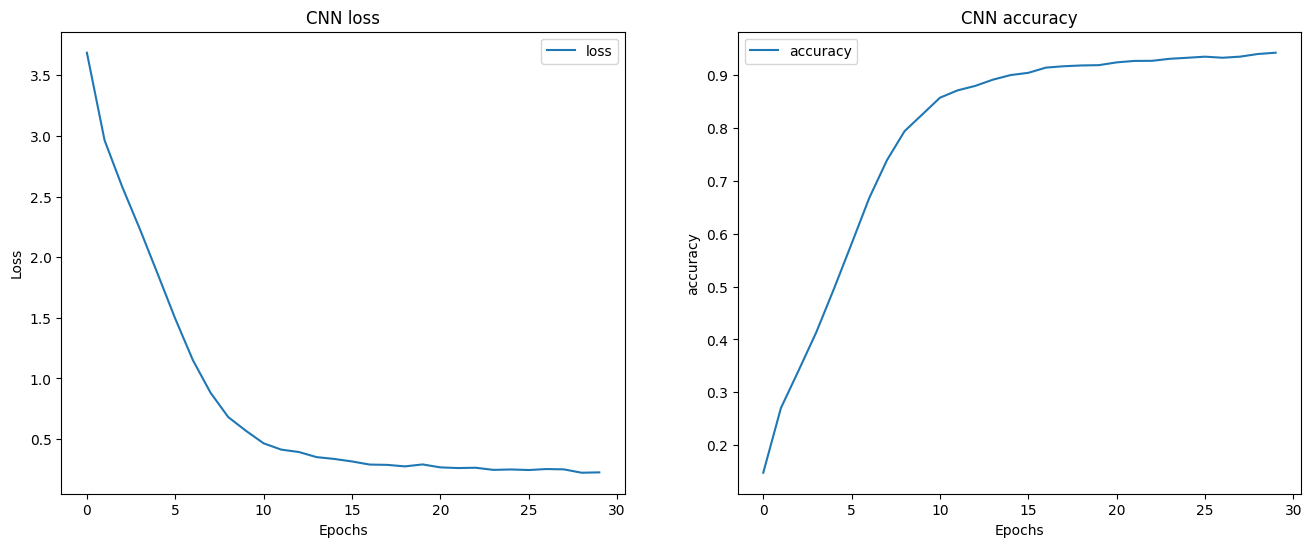

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

ax1.plot(history.history['loss'], label='loss')
ax1.set_title('CNN loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label='accuracy')
ax2.set_title('CNN accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()